<a href="https://colab.research.google.com/github/muhammadalfateh6/Muhammad_Alfateh_Work/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler


In [ ]:
data1= pd.read_csv('hddd.csv')
data= data1.drop(columns=['AgeCategory'])

In [ ]:
yes_no_columns= ['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Diabetic','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']

data.replace({'Female': 0, 'Male': 1}, inplace=True)
data.replace({'White': 0.2, 'Black': 0.4, 'Asian': 0.6, 'American Indian/Alaskan Native': 0.8,'Hispanic': 0.9, 'Other': 1 }, inplace=True)
data.replace({'No, borderline diabetes': 'No', 'Yes (during pregnancy)': 'Yes'}, inplace=True)
data.replace({'Poor': 0.2, 'Fair': 0.4,'Good': 0.6,'Very good': 0.8,'Excellent':1 }, inplace=True)
data.replace({'Yes': 1, 'No': 0})

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,0.2,1,1,0.8,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,0.2,0,1,0.8,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,0.2,1,1,0.4,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0.2,0,0,0.6,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,0.2,0,1,0.8,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,0.9,1,0,0.4,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,0.9,0,1,0.8,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,0.9,0,1,0.6,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,0.9,0,0,0.6,12.0,0,0,0


In [ ]:
for col in yes_no_columns:
    data[col].replace({'Yes': 1, 'No': 0}, inplace=True)

In [ ]:
for column in data:
    print(f'{column} : {data[column].unique()}')

HeartDisease : [0 1]
BMI : [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Smoking : [1 0]
AlcoholDrinking : [0 1]
Stroke : [0 1]
PhysicalHealth : [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
MentalHealth : [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
DiffWalking : [0 1]
Sex : [0 1]
Race : [0.2 0.4 0.6 0.8 1.  0.9]
Diabetic : [1 0]
PhysicalActivity : [1 0]
GenHealth : [0.8 0.4 0.6 0.2 1. ]
SleepTime : [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
Asthma : [1 0]
KidneyDisease : [0 1]
SkinCancer : [1 0]


In [ ]:
scale_columns = ['BMI','PhysicalHealth','MentalHealth','SleepTime']
scaler = MinMaxScaler()
data[scale_columns] = scaler.fit_transform(data[scale_columns])

In [ ]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.055294,1,0,0,0.100000,1.0,0,0,0.2,1,1,0.8,0.173913,1,0,1
1,0,0.100447,0,0,1,0.000000,0.0,0,0,0.2,0,1,0.8,0.260870,0,0,0
2,0,0.175782,1,0,0,0.666667,1.0,0,1,0.2,1,1,0.4,0.304348,1,0,0
3,0,0.147169,0,0,0,0.000000,0.0,0,0,0.2,0,0,0.6,0.217391,0,0,1
4,0,0.141132,0,0,0,0.933333,0.0,1,0,0.2,0,1,0.8,0.304348,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,0.185802,1,0,0,0.233333,0.0,1,1,0.9,1,0,0.4,0.217391,1,0,0
319791,0,0.215139,1,0,0,0.000000,0.0,0,1,0.9,0,1,0.8,0.173913,1,0,0
319792,0,0.147531,0,0,0,0.000000,0.0,0,0,0.9,0,1,0.6,0.217391,0,0,0
319793,0,0.250996,0,0,0,0.000000,0.0,0,0,0.9,0,0,0.6,0.478261,0,0,0


In [ ]:
x = data.drop(columns=['HeartDisease'])
y = data['HeartDisease']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)



RandomForestClassifier()

In [ ]:
r_probs = [0 for _ in range(len(y_test))]

In [ ]:
pred= model.predict(x_test)
accuracy_score(y_test, pred)

0.9020309886020732

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, pred)

print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest : AUROC = %.3f' % (rf_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest : AUROC = 0.549


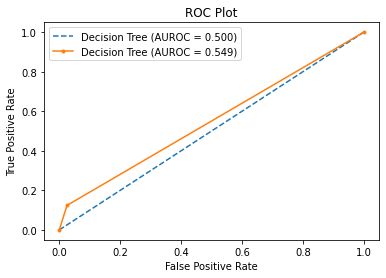

In [ ]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, pred)

plt.plot(r_fpr, r_tpr, linestyle='--', label='Decision Tree (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % rf_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58470
           1       0.31      0.12      0.17      5489

    accuracy                           0.90     63959
   macro avg       0.62      0.55      0.56     63959
weighted avg       0.87      0.90      0.88     63959

